# Variational Eigen Solver for two qubit Hamiltonian using OH encoding with JW transformation

In [ ]:
# General imports
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit
from qiskit.visualization import *
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options
from qiskit_ibm_runtime import EstimatorV2 as Estimator

In [ ]:
# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")
# To check for avilable backends
avilable_backend = service.backends()
print(avilable_backend)

qiskit_runtime_service.__init__:INFO:2024-04-04 11:47:45,044: Default instance: ibm-q/open/main


[<IBMBackend('simulator_extended_stabilizer')>, <IBMBackend('simulator_mps')>, <IBMBackend('simulator_statevector')>, <IBMBackend('simulator_stabilizer')>, <IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyoto')>, <IBMBackend('ibm_osaka')>, <IBMBackend('ibmq_qasm_simulator')>]


In [ ]:
#Simulator and Hamiltonian
backend = service.backend('ibmq_qasm_simulator')
hamiltonian = SparsePauliOp.from_list([("II", 5.9067091), ("IZ", 0.218291),
                                       ("ZI", -6.125), ("XX", -2.143304), ("YY", -2.143304)])

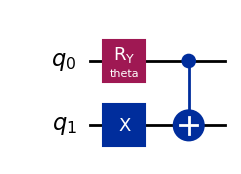

In [ ]:
#Ansatze
from qiskit.circuit import Parameter

theta = Parameter('theta')
ansatz = QuantumCircuit(2)
ansatz.ry(theta,0)
ansatz.x(1)
ansatz.cx(0,1)
num_params = ansatz.num_parameters
ansatz.draw("mpl")

In [ ]:
#Function to calcuate energy
def cost_func(params, ansatz, hamiltonian, estimator):
    """Parameters:
       params (ndarray): Array of ansatz parameters
       ansatz (QuantumCircuit): Parameterized ansatz circuit
       hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
       estimator (EstimatorV2): Estimator primitive instance"""
    pub = (ansatz, [hamiltonian], [params])
    result = estimator.run(pubs=[pub]).result()
    energy = result[0].data.evs[0]

    return energy

In [ ]:
#Specify a random initial set of parameters:
x0 = 2 * np.pi * np.random.random(num_params)

In [ ]:
#Minimization function as a function of shots
def minimization(S):
    with Session(backend=backend) as session:
        estimator = Estimator(session=session)
        estimator.options.default_shots = S

        res = minimize(
        cost_func,
        x0,
        args=(ansatz, hamiltonian, estimator),
        method="cobyla",
        # callback=callback
    )
    return(res.fun)
#Result
print('E_min =',minimization(10000))

base_primitive._run:INFO:2024-04-04 11:47:52,720: Submitting job using options {'options': {'default_shots': 10000}, 'version': 2, 'support_qiskit': True}
/opt/conda/lib/python3.10/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:878: UserWarning: Cloud simulators will be deprecated on 15 May 2024. Use the new local testing mode in qiskit-ibm-runtime version 0.22.0 or later to meet your debugging needs.
  warnings.warn(warning_message)
base_primitive._run:INFO:2024-04-04 11:47:58,023: Submitting job using options {'options': {'default_shots': 10000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 11:48:06,887: Submitting job using options {'options': {'default_shots': 10000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 11:48:13,655: Submitting job using options {'options': {'default_shots': 10000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 11:48:18,004: Submitting job using options {'opti

-1.7713607330670933


base_websocket_client.stream:INFO:2024-04-04 13:38:38,905: A websocket error occurred while streaming for job co7aqm84e2d51a9ih8tg. Connection closed with 1006.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/websocket/_app.py", line 500, in setSock
    dispatcher.read(self.sock.sock, read, check)
  File "/opt/conda/lib/python3.10/site-packages/websocket/_app.py", line 112, in read
    if not read_callback():
  File "/opt/conda/lib/python3.10/site-packages/websocket/_app.py", line 523, in read
    raise e
  File "/opt/conda/lib/python3.10/site-packages/websocket/_app.py", line 515, in read
    op_code, frame = self.sock.recv_data_frame(True)
  File "/opt/conda/lib/python3.10/site-packages/websocket/_core.py", line 437, in recv_data_frame
    frame = self.recv_frame()
  File "/opt/conda/lib/python3.10/site-packages/websocket/_core.py", line 478, in recv_frame
    return self.frame_buffer.recv_frame()
  File "/opt/conda/lib/python3.10/site-packages/webs

In [ ]:
#For differnet value of shots
Shots = [1e1,1e2,1e3,1e4,1e5,1e6,1e7]
Emin = []
for i in Shots:
    result = minimization(i)
    print('Completed for shots =',i)
    Emin.append(result)

base_primitive._run:INFO:2024-04-04 11:50:24,129: Submitting job using options {'options': {'default_shots': 10}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 11:50:33,199: Submitting job using options {'options': {'default_shots': 10}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 11:50:43,298: Submitting job using options {'options': {'default_shots': 10}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 11:50:50,588: Submitting job using options {'options': {'default_shots': 10}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 11:50:58,303: Submitting job using options {'options': {'default_shots': 10}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 11:51:05,608: Submitting job using options {'options': {'default_shots': 10}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 11:51:18,510: Submitting job using options {'options

Completed for shots = 10.0


base_primitive._run:INFO:2024-04-04 11:55:08,496: Submitting job using options {'options': {'default_shots': 100}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 11:55:13,828: Submitting job using options {'options': {'default_shots': 100}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 11:55:20,357: Submitting job using options {'options': {'default_shots': 100}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 11:55:25,620: Submitting job using options {'options': {'default_shots': 100}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 11:55:29,224: Submitting job using options {'options': {'default_shots': 100}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 11:55:42,479: Submitting job using options {'options': {'default_shots': 100}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 11:55:49,944: Submitting job using options {'o

Completed for shots = 100.0


base_primitive._run:INFO:2024-04-04 11:57:32,181: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 11:57:39,345: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 11:57:46,614: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 11:57:53,771: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 11:58:11,160: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 11:58:16,856: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 11:58:20,436: Submitting job using optio

Completed for shots = 1000.0


base_primitive._run:INFO:2024-04-04 11:59:59,298: Submitting job using options {'options': {'default_shots': 10000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:00:03,308: Submitting job using options {'options': {'default_shots': 10000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:00:07,890: Submitting job using options {'options': {'default_shots': 10000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:00:16,758: Submitting job using options {'options': {'default_shots': 10000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:00:28,559: Submitting job using options {'options': {'default_shots': 10000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:00:39,436: Submitting job using options {'options': {'default_shots': 10000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:00:43,571: Submitting job using

Completed for shots = 10000.0


base_primitive._run:INFO:2024-04-04 12:02:04,743: Submitting job using options {'options': {'default_shots': 100000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:02:12,263: Submitting job using options {'options': {'default_shots': 100000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:02:17,096: Submitting job using options {'options': {'default_shots': 100000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:02:22,407: Submitting job using options {'options': {'default_shots': 100000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:02:27,684: Submitting job using options {'options': {'default_shots': 100000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:02:31,686: Submitting job using options {'options': {'default_shots': 100000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:02:36,953: Submitting job

Completed for shots = 100000.0


base_primitive._run:INFO:2024-04-04 12:04:38,765: Submitting job using options {'options': {'default_shots': 1000000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:04:49,713: Submitting job using options {'options': {'default_shots': 1000000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:05:08,124: Submitting job using options {'options': {'default_shots': 1000000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:05:26,232: Submitting job using options {'options': {'default_shots': 1000000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:05:37,688: Submitting job using options {'options': {'default_shots': 1000000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:05:52,305: Submitting job using options {'options': {'default_shots': 1000000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:06:06,438: Submitti

Completed for shots = 1000000.0


base_primitive._run:INFO:2024-04-04 12:09:49,950: Submitting job using options {'options': {'default_shots': 10000000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:13:11,955: Submitting job using options {'options': {'default_shots': 10000000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:15:01,012: Submitting job using options {'options': {'default_shots': 10000000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:16:43,037: Submitting job using options {'options': {'default_shots': 10000000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:18:50,836: Submitting job using options {'options': {'default_shots': 10000000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:20:57,224: Submitting job using options {'options': {'default_shots': 10000000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:23:08,767: Su

Completed for shots = 10000000.0


In [ ]:
#Calculate true value using StatevectorEstimator
from qiskit.primitives import StatevectorEstimator
estimator1 = StatevectorEstimator()

res1 = minimize(
    cost_func,x0,
    args=(ansatz, hamiltonian, estimator1),method="cobyla")
True_value = res1.fun
print('True_value:',True_value)
print('E_min:',Emin)

True_value: -1.7491610912381628
E_min: [-1.6692594625000008, -2.3951925875000013, -1.5091276285156257, -1.7004595200079868, -1.747690381760001, -1.7482837862679994, -1.7507229982048007]


In [ ]:
#Calculation of MAD
def median_absolute_deviation(data):
    # Calculate the median of the dataset
    median = np.median(data)

    # Calculate the absolute deviations from the median
    abs_deviations = np.abs(data - median)

    # Calculate the median of the absolute deviations
    mad = np.median(abs_deviations)

    return mad

#MAD for Emin (different shots)
data = np.array(Emin)
mad_value = median_absolute_deviation(data)
print("Median Absolute Deviation (MAD):", mad_value)

Median Absolute Deviation (MAD): 0.047230861752014075


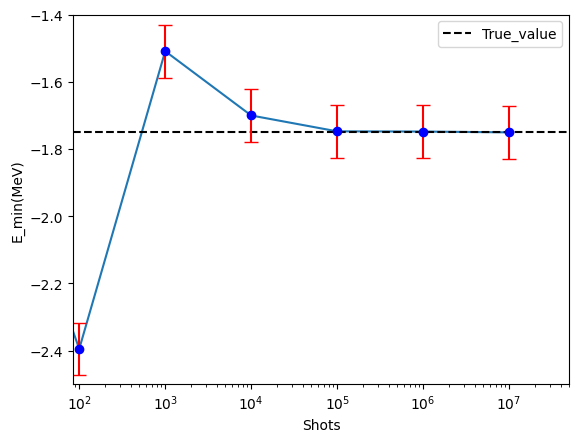

In [ ]:
#Shots vs Emin
plt.plot(Shots,Emin)
plt.axhline(y=True_value, color='k', linestyle='--',label = 'True_value')
plt.errorbar(Shots,Emin, yerr=mad_value, fmt='o', color='blue', ecolor='red', capsize=5)
plt.xscale('log')
plt.ylim(-2.5,-1.4)
plt.xlim(85,5e7)
plt.ylabel('E_min(MeV)')
plt.xlabel('Shots')
plt.legend()

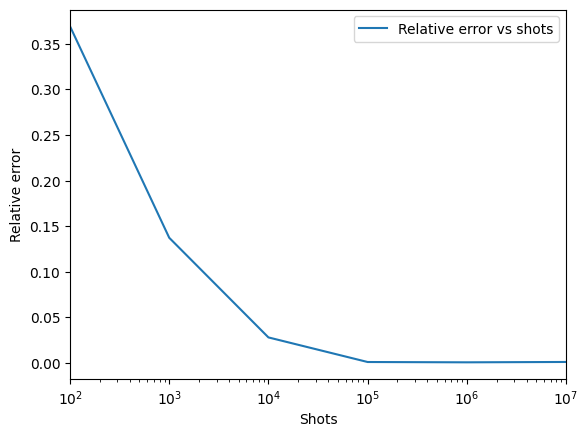

In [ ]:
#Relative error
Error = []
for i in Emin:
    error = np.abs(True_value-i)/np.abs(True_value)
    Error.append(error)
Error
plt.plot(Shots,Error,label = 'Relative error vs shots')
plt.xscale('log')
plt.xlim(100,1e7)
plt.ylabel('Relative error')
plt.xlabel('Shots')
plt.legend()

In [ ]:
#For differnet value of runs
Emin_runs = []
for i in range(1,51):
    Emin_runs.append(minimization(1000))
    print('Completed for runs=',i)
print('Emin_runs=',Emin_runs)

base_primitive._run:INFO:2024-04-04 12:48:33,264: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:48:37,280: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:48:40,366: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:48:43,888: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:48:47,848: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:48:51,572: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:48:54,734: Submitting job using optio

Completed for runs= 1


base_primitive._run:INFO:2024-04-04 12:49:55,182: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:49:58,717: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:50:01,688: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:50:05,240: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:50:08,699: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:50:12,820: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:50:16,728: Submitting job using optio

Completed for runs= 2


base_primitive._run:INFO:2024-04-04 12:51:13,724: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:51:16,637: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:51:20,580: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:51:23,960: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:51:27,361: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:51:30,826: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:51:33,988: Submitting job using optio

Completed for runs= 3


base_primitive._run:INFO:2024-04-04 12:52:25,692: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:52:28,709: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:52:31,964: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:52:35,695: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:52:38,798: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:52:44,952: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:52:48,783: Submitting job using optio

Completed for runs= 4


base_primitive._run:INFO:2024-04-04 12:53:46,311: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:53:50,400: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:53:54,075: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:53:57,336: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:54:00,912: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:54:04,420: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:54:10,175: Submitting job using optio

Completed for runs= 5


base_primitive._run:INFO:2024-04-04 12:55:06,985: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:55:10,692: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:55:14,228: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:55:17,665: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:55:21,555: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:55:24,584: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:55:28,115: Submitting job using optio

Completed for runs= 6


base_primitive._run:INFO:2024-04-04 12:56:37,664: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:56:41,116: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:56:45,217: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:56:48,461: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:56:52,715: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:56:56,910: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:57:00,474: Submitting job using optio

Completed for runs= 7


base_primitive._run:INFO:2024-04-04 12:58:34,969: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:58:45,869: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:58:49,352: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:58:53,122: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:58:56,260: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:58:59,669: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 12:59:05,133: Submitting job using optio

Completed for runs= 8


base_primitive._run:INFO:2024-04-04 13:00:55,265: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:01:04,372: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:01:13,808: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:01:17,068: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:01:24,510: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:01:28,049: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:01:31,556: Submitting job using optio

Completed for runs= 9


base_primitive._run:INFO:2024-04-04 13:03:24,176: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:03:27,871: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:03:32,168: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:03:35,831: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:03:39,848: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:03:52,131: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:03:59,260: Submitting job using optio

Completed for runs= 10


base_primitive._run:INFO:2024-04-04 13:05:31,546: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:05:38,733: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:05:42,060: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:05:45,357: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:05:48,981: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:06:00,601: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:06:10,592: Submitting job using optio

Completed for runs= 11


base_primitive._run:INFO:2024-04-04 13:07:50,896: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:07:58,874: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:08:14,720: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:08:18,395: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:08:21,956: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:08:34,016: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:08:51,644: Submitting job using optio

Completed for runs= 12


base_primitive._run:INFO:2024-04-04 13:10:32,230: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:10:40,504: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:10:48,463: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:10:59,002: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:11:08,311: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:11:17,744: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:11:24,151: Submitting job using optio

Completed for runs= 13


base_primitive._run:INFO:2024-04-04 13:13:15,092: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:13:18,832: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:13:22,635: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:13:26,485: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:13:34,988: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:13:51,068: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:13:54,929: Submitting job using optio

Completed for runs= 14


base_primitive._run:INFO:2024-04-04 13:15:44,419: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:15:47,736: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:16:00,856: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:16:05,126: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:16:14,379: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:16:18,632: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:16:22,080: Submitting job using optio

Completed for runs= 15


base_primitive._run:INFO:2024-04-04 13:17:54,613: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:18:06,587: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:18:14,574: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:18:18,164: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:18:21,978: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:18:26,588: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:18:29,881: Submitting job using optio

Completed for runs= 16


base_primitive._run:INFO:2024-04-04 13:20:27,975: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:20:31,911: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:20:35,611: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:20:43,861: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:20:51,883: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:21:01,230: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:21:16,764: Submitting job using optio

Completed for runs= 17


base_primitive._run:INFO:2024-04-04 13:22:53,555: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:23:03,904: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:23:09,631: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:23:13,667: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:23:17,488: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:23:20,936: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:23:32,419: Submitting job using optio

Completed for runs= 18


base_primitive._run:INFO:2024-04-04 13:25:08,196: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:25:11,336: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:25:15,152: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:25:26,554: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:25:30,724: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:25:42,095: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:25:46,610: Submitting job using optio

Completed for runs= 19


base_primitive._run:INFO:2024-04-04 13:27:34,153: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:27:38,311: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:27:42,040: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:27:45,564: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:27:49,055: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:27:52,514: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:27:55,640: Submitting job using optio

Completed for runs= 20


base_primitive._run:INFO:2024-04-04 13:28:57,608: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:29:01,955: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:29:05,255: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:29:08,723: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:29:12,079: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:29:16,094: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:29:19,240: Submitting job using optio

Completed for runs= 21


base_primitive._run:INFO:2024-04-04 13:30:26,665: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:30:29,943: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:30:34,053: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:30:37,984: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:30:41,952: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:30:45,743: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:30:49,624: Submitting job using optio

Completed for runs= 22


base_primitive._run:INFO:2024-04-04 13:32:25,110: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:32:29,062: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:32:32,655: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:32:37,296: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:32:50,656: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:32:59,860: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:33:08,061: Submitting job using optio

Completed for runs= 23


base_primitive._run:INFO:2024-04-04 13:34:41,390: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:34:45,807: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:34:55,372: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:35:03,682: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:35:06,857: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:35:10,853: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:35:23,241: Submitting job using optio

Completed for runs= 24


base_primitive._run:INFO:2024-04-04 13:36:59,845: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:37:03,191: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:37:06,780: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:37:10,760: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:37:18,668: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:37:22,121: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:37:32,087: Submitting job using optio

Completed for runs= 25


base_primitive._run:INFO:2024-04-04 13:39:01,801: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:39:06,100: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:39:13,932: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:39:23,516: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:39:30,192: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:39:38,664: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:39:46,337: Submitting job using optio

Completed for runs= 26


base_primitive._run:INFO:2024-04-04 13:41:40,870: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:41:44,553: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:41:48,200: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:41:51,489: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:42:03,234: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:42:18,380: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:42:26,033: Submitting job using optio

Completed for runs= 27


base_primitive._run:INFO:2024-04-04 13:44:31,655: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:44:35,112: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:44:39,429: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:44:47,226: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:44:51,204: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:44:55,460: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:44:59,462: Submitting job using optio

Completed for runs= 28


base_primitive._run:INFO:2024-04-04 13:46:29,252: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:46:32,698: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:46:36,426: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:46:49,944: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:46:53,637: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:46:59,161: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:47:06,075: Submitting job using optio

Completed for runs= 29


base_primitive._run:INFO:2024-04-04 13:48:48,324: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:49:06,370: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:49:10,031: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:49:13,421: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:49:17,169: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:49:26,862: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:49:44,920: Submitting job using optio

Completed for runs= 30


base_primitive._run:INFO:2024-04-04 13:51:46,363: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:51:50,324: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:51:53,658: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:51:58,147: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:52:01,776: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:52:08,532: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:52:15,960: Submitting job using optio

Completed for runs= 31


base_primitive._run:INFO:2024-04-04 13:53:49,461: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:53:52,600: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:53:56,563: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:54:07,834: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:54:14,651: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:54:24,912: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:54:28,508: Submitting job using optio

Completed for runs= 32


base_primitive._run:INFO:2024-04-04 13:56:10,525: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:56:16,228: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:56:23,057: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:56:26,775: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:56:30,102: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:56:35,096: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:56:46,449: Submitting job using optio

Completed for runs= 33


base_primitive._run:INFO:2024-04-04 13:58:40,206: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:58:50,919: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:58:55,933: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:59:07,354: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:59:13,276: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:59:16,618: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 13:59:23,042: Submitting job using optio

Completed for runs= 34


base_primitive._run:INFO:2024-04-04 14:01:08,144: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:01:12,268: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:01:19,867: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:01:32,765: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:01:36,486: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:01:51,493: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:01:54,980: Submitting job using optio

Completed for runs= 35


base_primitive._run:INFO:2024-04-04 14:03:36,012: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:03:49,780: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:03:53,175: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:04:01,387: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:04:10,940: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:04:18,829: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:04:30,188: Submitting job using optio

Completed for runs= 36


base_primitive._run:INFO:2024-04-04 14:06:12,978: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:06:28,412: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:06:36,737: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:06:45,696: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:06:50,693: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:06:55,716: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:07:02,317: Submitting job using optio

Completed for runs= 37


base_primitive._run:INFO:2024-04-04 14:08:52,667: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:09:07,008: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:09:17,469: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:09:21,333: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:09:25,263: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:09:32,025: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:09:42,108: Submitting job using optio

Completed for runs= 38


base_primitive._run:INFO:2024-04-04 14:11:06,000: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:11:18,469: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:11:25,589: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:11:33,220: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:11:54,777: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:11:58,627: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:12:02,448: Submitting job using optio

Completed for runs= 39


base_primitive._run:INFO:2024-04-04 14:14:04,827: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:14:09,863: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:14:19,426: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:14:27,433: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:14:33,647: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:14:41,327: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:14:46,417: Submitting job using optio

Completed for runs= 40


base_primitive._run:INFO:2024-04-04 14:16:43,988: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:16:47,942: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:16:55,560: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:16:59,377: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:17:12,520: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:17:22,579: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:17:26,117: Submitting job using optio

Completed for runs= 41


base_primitive._run:INFO:2024-04-04 14:19:14,329: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:19:20,260: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:19:30,532: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:19:37,132: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:19:41,379: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:19:56,944: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:20:00,538: Submitting job using optio

Completed for runs= 42


base_primitive._run:INFO:2024-04-04 14:21:46,680: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:21:50,276: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:22:00,048: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:22:10,572: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:22:20,728: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:22:24,193: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:22:28,050: Submitting job using optio

Completed for runs= 43


base_primitive._run:INFO:2024-04-04 14:24:06,574: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:24:16,274: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:24:20,895: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:24:25,328: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:24:28,660: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:24:36,578: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:24:47,632: Submitting job using optio

Completed for runs= 44


base_primitive._run:INFO:2024-04-04 14:27:02,659: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:27:07,146: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:27:11,230: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:27:15,138: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:27:24,490: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:27:32,288: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:27:39,425: Submitting job using optio

Completed for runs= 45


base_primitive._run:INFO:2024-04-04 14:29:25,793: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:29:36,177: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:29:43,114: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:29:50,917: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:29:55,156: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:29:59,609: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:30:04,676: Submitting job using optio

Completed for runs= 46


base_primitive._run:INFO:2024-04-04 14:31:51,853: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:31:58,293: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:32:02,550: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:32:09,708: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:32:20,868: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:32:29,419: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:32:36,268: Submitting job using optio

Completed for runs= 47


base_primitive._run:INFO:2024-04-04 14:34:26,725: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:34:30,118: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:34:34,110: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:34:38,440: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:34:41,992: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:34:57,673: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:35:06,042: Submitting job using optio

Completed for runs= 48


base_primitive._run:INFO:2024-04-04 14:36:46,131: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:36:56,537: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:37:02,115: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:37:13,236: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:37:22,413: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:37:26,200: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:37:29,618: Submitting job using optio

Completed for runs= 49


base_primitive._run:INFO:2024-04-04 14:39:13,756: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:39:18,277: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:39:22,257: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:39:37,077: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:39:42,899: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:39:52,380: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
base_primitive._run:INFO:2024-04-04 14:40:10,576: Submitting job using optio

Completed for runs= 50
Emin_runs= [-1.5972881441406255, -1.5192741070312508, -1.750908694921876, -1.8395767554687503, -1.6839738453125004, -1.7220698550781255, -1.7479502261718758, -1.6220232242187502, -1.6165314507812498, -1.6979681011718757, -1.684520370703125, -1.7722601421875002, -1.6739487281250005, -1.7427879761718756, -1.6761480894531253, -1.6006283765625007, -1.3229896421875007, -1.4129331949218753, -1.7230415445312506, -1.8322629644531254, -1.5404173921875008, -1.789555650000001, -1.6298489800781257, -1.2339442378906251, -1.8107813160156252, -1.6628305601562499, -1.476315230078125, -1.9279932535156261, -1.9234687496093752, -1.7358125484375009, -1.96799366171875, -1.65323060703125, -1.619572300390625, -1.8161517281250004, -1.6290030718750006, -1.4164426089843758, -1.607859786718751, -1.6153861597656252, -1.7392351617187507, -1.684182007421875, -1.9218203335937512, -1.7179705152343758, -1.737630146093751, -1.7776305542968753, -1.8235089195312502, -1.7592375757812504, -1.58172785

In [ ]:
# Caclulate MAD for Emin_runs
data = np.array(Emin_runs)
mad_value = median_absolute_deviation(data)
print("Median Absolute Deviation (MAD):", mad_value)

Median Absolute Deviation (MAD): 0.0784369912109375


Text(0.5, 0, 'N')

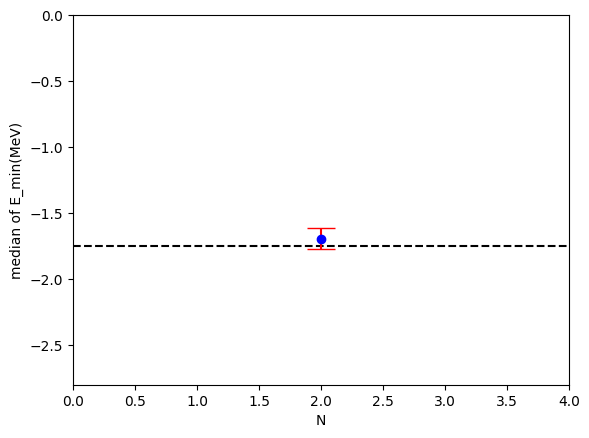

In [ ]:
#Basis number (N) vs median of Emin_runs
N = [2]
m = np.median(np.array(Emin_runs))
median = [m]
plt.axhline(y=True_value, color='k', linestyle='--')
plt.errorbar(N,median, yerr=mad_value, fmt='o', color='blue', ecolor='red', capsize=10)
# plt.xscale('log')
plt.ylim(-2.8,0)
plt.xlim(0,4)
plt.ylabel('median of E_min(MeV)')
plt.xlabel('N')